### Importing the libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv("/content/train.csv")

### Descriptive Analysis 

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
df.duplicated().sum()

0

In [12]:
df.columns.str.strip()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
#Remove unwanted column
df.drop(['Loan_ID'],axis=1,inplace=True)

### Handling Categorical Feature Columns

In [14]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [15]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [17]:
df['Education']=df['Education'].map({'Not Graduate':0,'Graduate':1})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
df['Self_Employed']=df['Self_Employed'].map({'Yes':0,'No':1})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0,1,1.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1,1,1.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0,1,0.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0,0,1.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0,1,1.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [21]:
df['Property_Area']=df['Property_Area'].map({'Semiurban':0,'Urban':1,'Rural':2})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0,1,1.0,5849,0.0,NaN,360.0,1.0,1,Y
1,1.0,Yes,1,1,1.0,4583,1508.0,128.0,360.0,1.0,2,N
2,1.0,Yes,0,1,0.0,3000,0.0,66.0,360.0,1.0,1,Y
3,1.0,Yes,0,0,1.0,2583,2358.0,120.0,360.0,1.0,1,Y
4,1.0,No,0,1,1.0,6000,0.0,141.0,360.0,1.0,1,Y


In [22]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [23]:
df['Loan_Status']=df['Loan_Status'].map({'N':0,'Y':1})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0,1,1.0,5849,0.0,NaN,360.0,1.0,1,1
1,1.0,Yes,1,1,1.0,4583,1508.0,128.0,360.0,1.0,2,0
2,1.0,Yes,0,1,0.0,3000,0.0,66.0,360.0,1.0,1,1
3,1.0,Yes,0,0,1.0,2583,2358.0,120.0,360.0,1.0,1,1
4,1.0,No,0,1,1.0,6000,0.0,141.0,360.0,1.0,1,1


In [24]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [25]:
df['Dependents']=df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3,'nan':'nan'})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0,1,1.0,5849,0.0,NaN,360.0,1.0,1,1
1,1.0,Yes,1,1,1.0,4583,1508.0,128.0,360.0,1.0,2,0
2,1.0,Yes,0,1,0.0,3000,0.0,66.0,360.0,1.0,1,1
3,1.0,Yes,0,0,1.0,2583,2358.0,120.0,360.0,1.0,1,1
4,1.0,No,0,1,1.0,6000,0.0,141.0,360.0,1.0,1,1


In [26]:
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [27]:
df['Dependents'].unique()

array([0, 1, 2, 3, nan], dtype=object)

In [28]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [29]:
df['Married']=df['Married'].map({'Yes':0,'No':1})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,0,1,1.0,5849,0.0,NaN,360.0,1.0,1,1
1,1.0,0.0,1,1,1.0,4583,1508.0,128.0,360.0,1.0,2,0
2,1.0,0.0,0,1,0.0,3000,0.0,66.0,360.0,1.0,1,1
3,1.0,0.0,0,0,1.0,2583,2358.0,120.0,360.0,1.0,1,1
4,1.0,1.0,0,1,1.0,6000,0.0,141.0,360.0,1.0,1,1


### Handline Missing Values 

In [30]:
#Find the total number of missing values from the entire datase
df.isnull().sum().sum()

149

In [31]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
df['Dependents'] = df['Dependents'].fillna(0)
df['Dependents'].isnull().sum()

0

In [33]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [34]:
df['Dependents'].unique()

array([0, 1, 2, 3])

In [35]:
#Replace the missing values for numerical columns with mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [36]:
df['LoanAmount'].unique()
df['Credit_History'].unique()

array([1.        , 0.        , 0.84219858])

In [37]:
df.isnull().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
#Replace the missing values for categorical columns with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [39]:
df['Gender'].unique()
df['Married'].unique()
df['Self_Employed'].unique()

array([1., 0.])

In [40]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [42]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [43]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Exploratory Data Analysis 

### Univariate Analysis 

<Axes: >

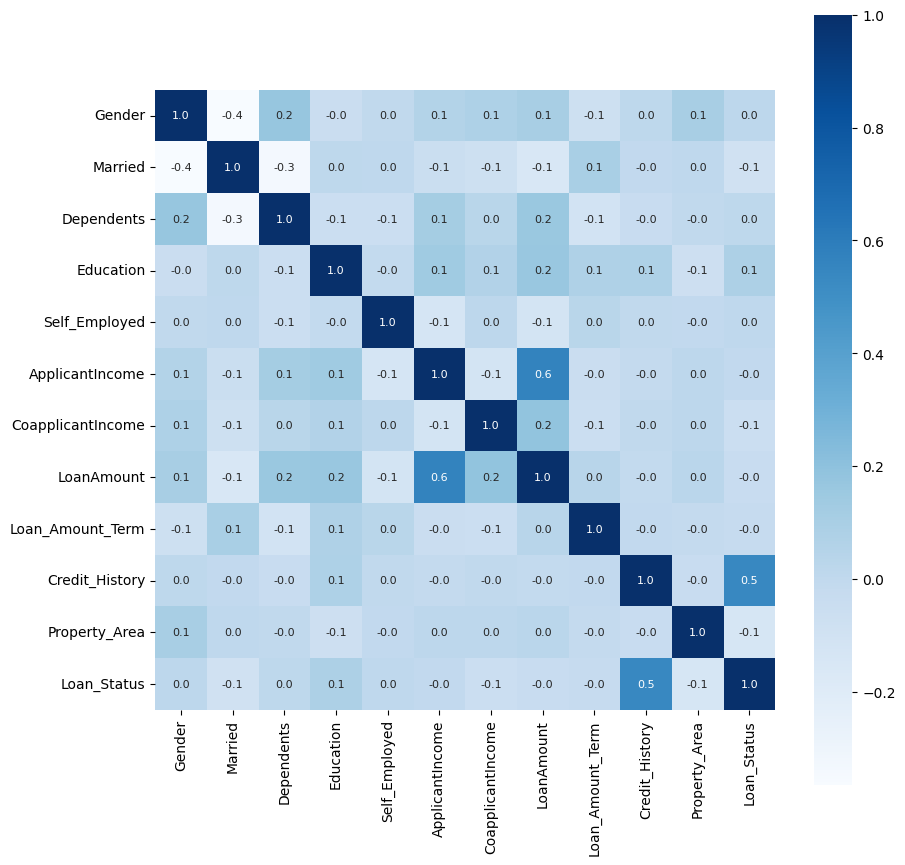

In [44]:
#Visualization
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')

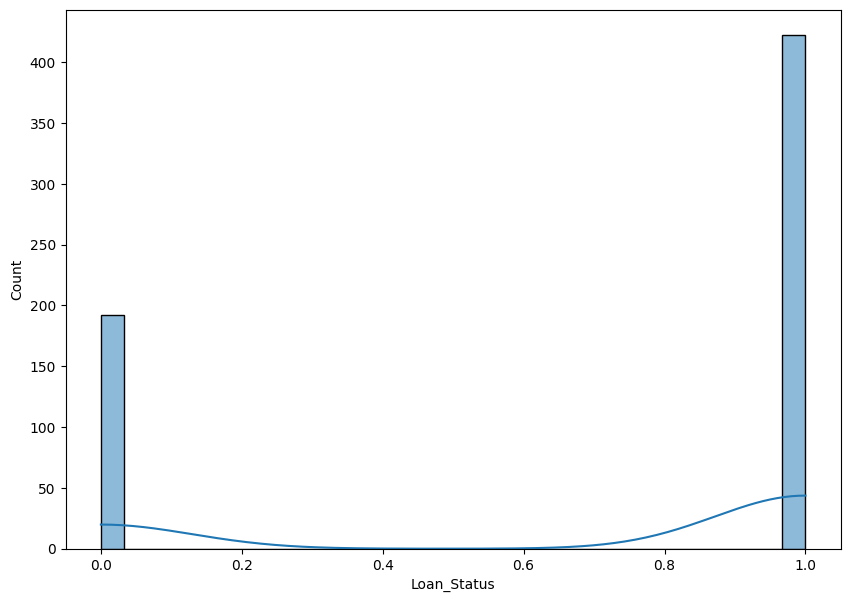

In [45]:
plt.figure(figsize=(10,7))
sns.histplot(df['Loan_Status'],kde=True,bins=30)
plt.show()

<ipython-input-47-84e8628f7f03>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


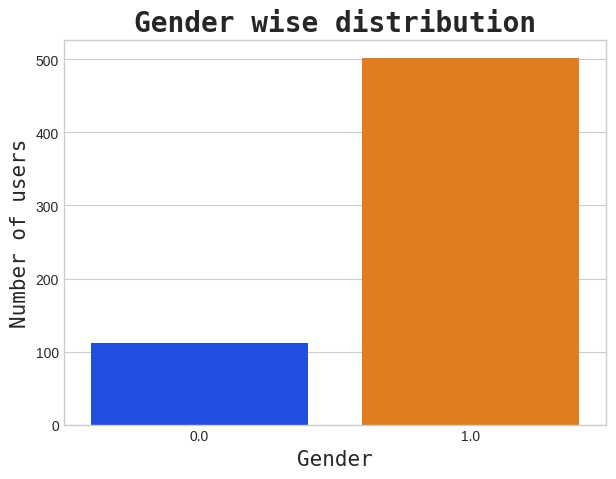

In [47]:
# Creating a barplot for 'Gender'
gen = df['Gender'].value_counts()

plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(x=gen.index, y=gen.values, palette = 'bright')
plt.title('Gender wise distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of users', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

<ipython-input-48-571d4b2bcb7e>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


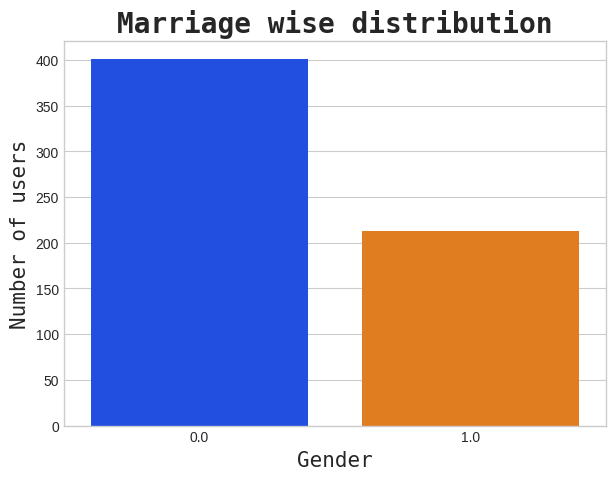

In [48]:
married = df['Married'].value_counts()

plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(x=married.index, y=married.values, palette = 'bright')
plt.title('Marriage wise distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of users', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

<ipython-input-49-6c1c696d998f>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


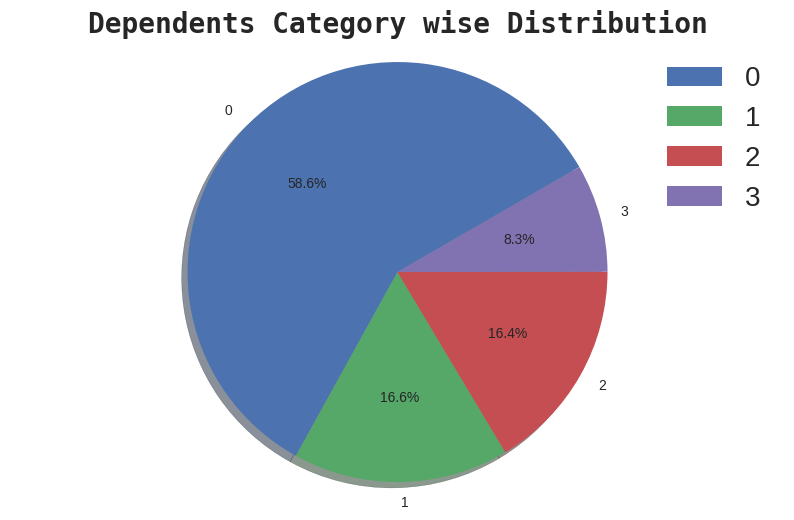

In [49]:
# Creating a pie chart for 'City Category'
dependents = df['Dependents'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize = (10, 6))
plt.pie(dependents.values, labels = dependents.index, startangle = 30, shadow = True, autopct = '%1.1f%%')
plt.title('Dependents Category wise Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')
plt.show()

<ipython-input-51-765b9b60c248>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


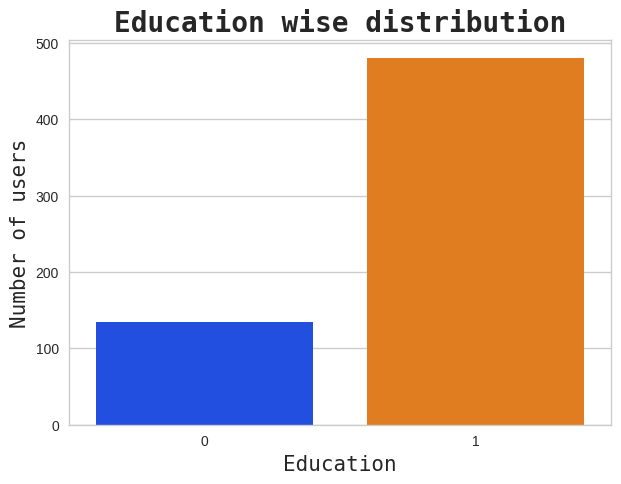

In [51]:
Education = df['Education'].value_counts()

plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(x=Education.index,y=Education.values, palette = 'bright')
plt.title('Education wise distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Education', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of users', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

<ipython-input-52-2db3573c7b6c>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


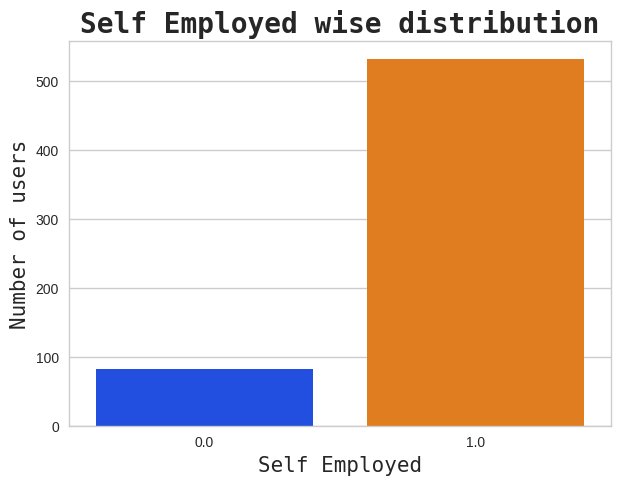

In [52]:
self_employed = df['Self_Employed'].value_counts()

plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(x=self_employed.index, y=self_employed.values, palette = 'bright')
plt.title('Self Employed wise distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Self Employed', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of users', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

<ipython-input-53-82f22ce57500>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


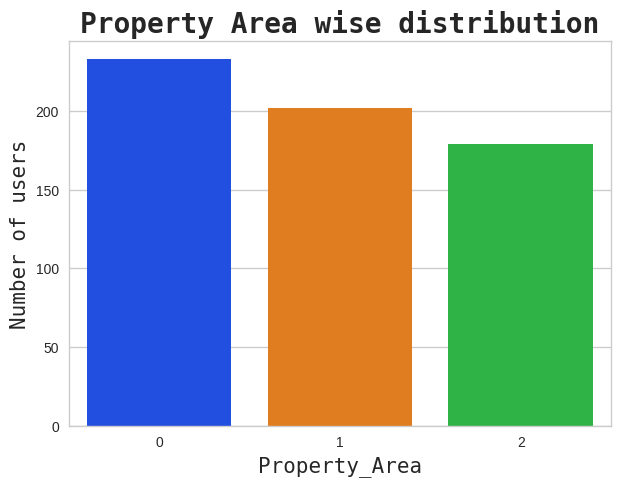

In [53]:
Property = df['Property_Area'].value_counts()

plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(x=Property.index,y=Property.values, palette = 'bright')
plt.title('Property Area wise distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Property_Area', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of users', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

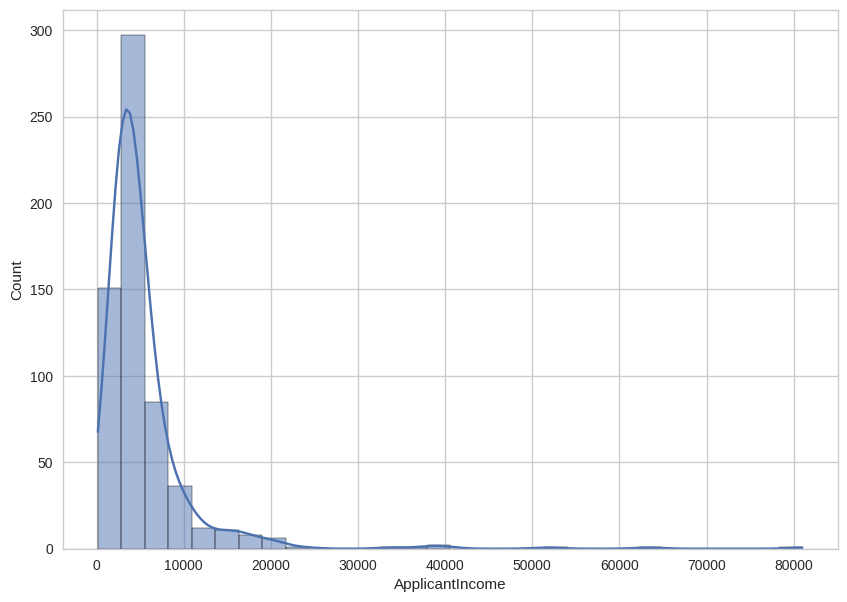

In [55]:
plt.figure(figsize=(10,7))
sns.histplot(df['ApplicantIncome'],kde=True,bins=30)
plt.show()

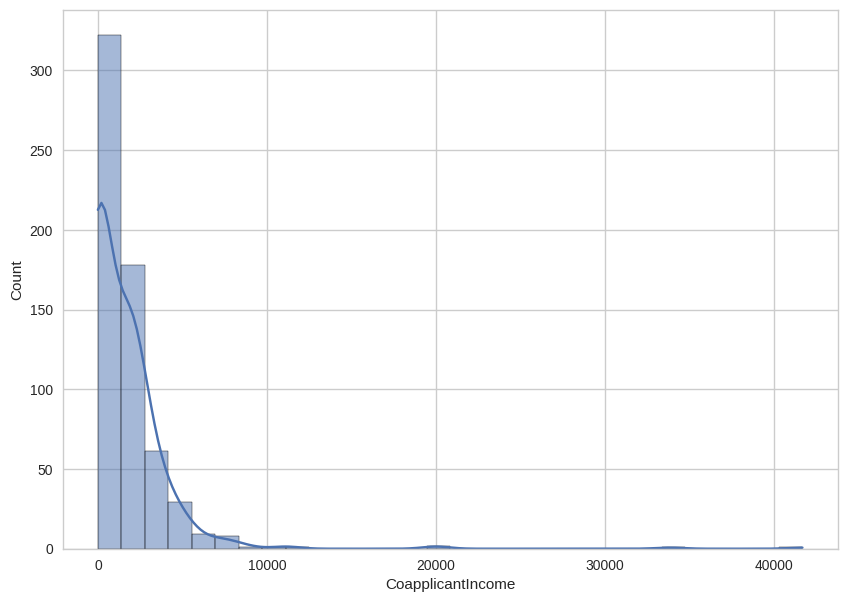

In [56]:
plt.figure(figsize=(10,7))
sns.histplot(df['CoapplicantIncome'],kde=True,bins=30)
plt.show()

### Bivariate Analysis 

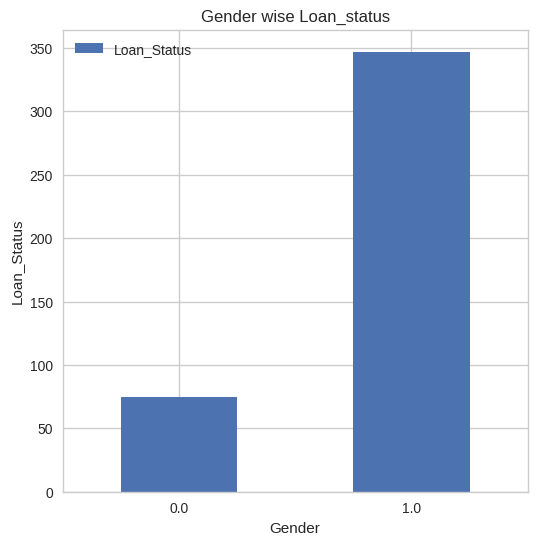

In [57]:
Gender_plot = df.pivot_table(index='Gender',values='Loan_Status', aggfunc=np.sum)
Gender_plot.plot(kind='bar',figsize=(6,6))
plt.xlabel('Gender')
plt.ylabel('Loan_Status')
plt.legend()
plt.title("Gender wise Loan_status")
plt.xticks(rotation=0)
plt.show()

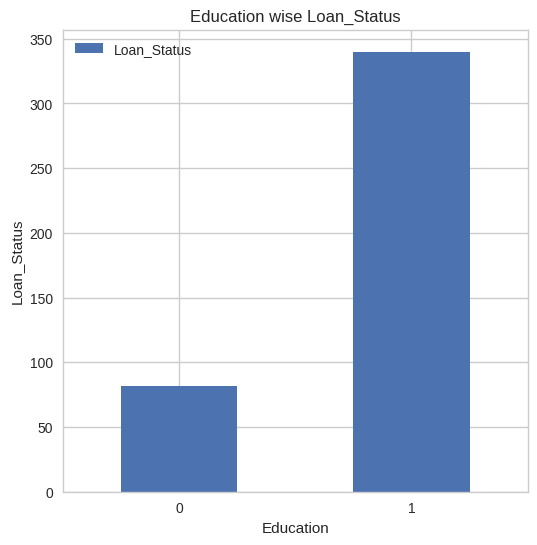

In [58]:
Gender_plot = df.pivot_table(index='Education',values='Loan_Status', aggfunc=np.sum)
Gender_plot.plot(kind='bar',figsize=(6,6))
plt.xlabel('Education')
plt.ylabel('Loan_Status')
plt.legend()
plt.title("Education wise Loan_Status")
plt.xticks(rotation=0)
plt.show()

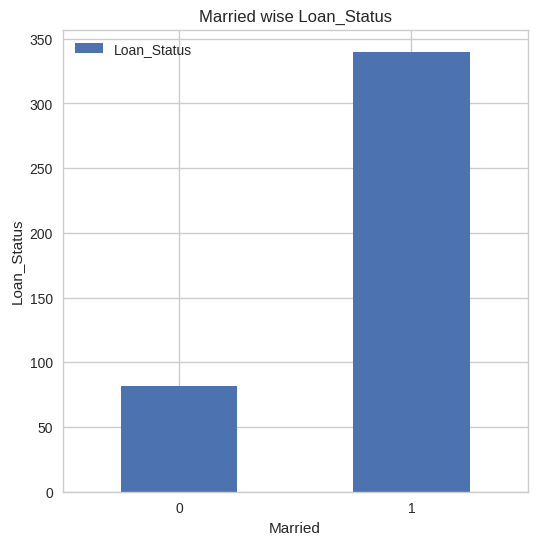

In [59]:
Mar_plot = df.pivot_table(index='Married',values='Loan_Status', aggfunc=np.sum)
Gender_plot.plot(kind='bar',figsize=(6,6))
plt.xlabel('Married')
plt.ylabel('Loan_Status')
plt.legend()
plt.title("Married wise Loan_Status")
plt.xticks(rotation=0)
plt.show()

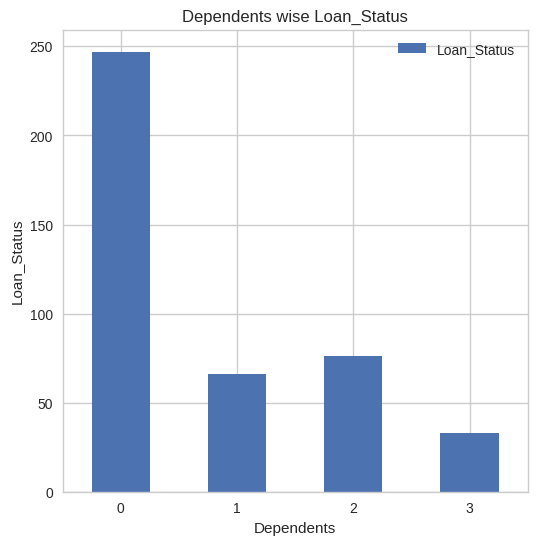

In [60]:
Gender_plot = df.pivot_table(index='Dependents',values='Loan_Status', aggfunc=np.sum)
Gender_plot.plot(kind='bar',figsize=(6,6))
plt.xlabel('Dependents')
plt.ylabel('Loan_Status')
plt.legend()
plt.title("Dependents wise Loan_Status")
plt.xticks(rotation=0)
plt.show()

### Splitting the input and output features

In [61]:
X = df.drop('Loan_Status',axis=1)

In [62]:
Y = df['Loan_Status']

In [63]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

### Feature Scaling 

In [64]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,0,1,1.0,5849,0.0,146.412162,360.0,1.0,1,1
1,1.0,0.0,1,1,1.0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1.0,0.0,0,1,0.0,3000,0.0,66.000000,360.0,1.0,1,1
3,1.0,0.0,0,0,1.0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1.0,1.0,0,1,1.0,6000,0.0,141.000000,360.0,1.0,1,1


In [65]:
cols = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

In [66]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [67]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,1.372089,-0.737806,0.528362,0.392601,0.072991,-0.554487,0.000000,0.273231,0.451640,0.107989
1,0.472343,-0.728816,0.253470,0.528362,0.392601,-0.134412,-0.038732,-0.219273,0.273231,0.451640,1.335861
2,0.472343,-0.728816,-0.737806,0.528362,-2.547117,-0.393747,-0.554487,-0.957641,0.273231,0.451640,0.107989
3,0.472343,-0.728816,-0.737806,-1.892641,0.392601,-0.462062,0.251980,-0.314547,0.273231,0.451640,0.107989
4,0.472343,1.372089,-0.737806,0.528362,0.392601,0.097728,-0.554487,-0.064454,0.273231,0.451640,0.107989
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,1.372089,-0.737806,0.528362,0.392601,-0.410130,-0.554487,-0.898095,0.273231,0.451640,1.335861
610,0.472343,-0.728816,2.236021,0.528362,0.392601,-0.212557,-0.554487,-1.267279,-2.522836,0.451640,1.335861
611,0.472343,-0.728816,0.253470,0.528362,0.392601,0.437174,-0.472404,1.269371,0.273231,0.451640,0.107989
612,0.472343,-0.728816,1.244745,0.528362,0.392601,0.357064,-0.554487,0.483367,0.273231,0.451640,0.107989


### Splitting the dataset into training and test data 

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [69]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,Y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)
    

### Model Building

In [70]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_val(model_log,X,Y)

LogisticRegression() accuracy is 0.7967479674796748
LogisticRegression() Avg cross val score is 0.809462881514061


In [71]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,Y)

SVC() accuracy is 0.7886178861788617
SVC() Avg cross val score is 0.8029321604691457


In [72]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,Y)

DecisionTreeClassifier() accuracy is 0.6991869918699187
DecisionTreeClassifier() Avg cross val score is 0.6824870051979209


In [73]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,Y)

RandomForestClassifier() accuracy is 0.7642276422764228
RandomForestClassifier() Avg cross val score is 0.7850459816073571


In [74]:
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model_val(model,X,Y)

GradientBoostingClassifier() accuracy is 0.7642276422764228
GradientBoostingClassifier() Avg cross val score is 0.7817672930827669


In [75]:
model_df

{LogisticRegression(): 80.95,
 SVC(): 80.29,
 DecisionTreeClassifier(): 68.25,
 RandomForestClassifier(): 78.5,
 GradientBoostingClassifier(): 78.18}

In [76]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,0,1,1.0,5849,0.0,146.412162,360.0,1.0,1,1
1,1.0,0.0,1,1,1.0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1.0,0.0,0,1,0.0,3000,0.0,66.000000,360.0,1.0,1,1
3,1.0,0.0,0,0,1.0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1.0,1.0,0,1,1.0,6000,0.0,141.000000,360.0,1.0,1,1
5,1.0,0.0,2,1,0.0,5417,4196.0,267.000000,360.0,1.0,1,1
6,1.0,0.0,0,0,1.0,2333,1516.0,95.000000,360.0,1.0,1,1
7,1.0,0.0,3,1,1.0,3036,2504.0,158.000000,360.0,0.0,0,0
8,1.0,0.0,2,1,1.0,4006,1526.0,168.000000,360.0,1.0,1,1
9,1.0,0.0,1,1,1.0,12841,10968.0,349.000000,360.0,1.0,0,0


### Predictive System 

In [77]:
input_data = (1.0,1.0,0,1,1.0,5849,0.0,146.412162,360.0,1.0,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = st.transform(input_data_reshaped)
print(std_data)

prediction = model_log.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('Loan Not Approved')
else:
  print('Loan Approved')

[[ 4.72342640e-01  1.37208932e+00 -7.37806323e-01  5.28362249e-01
   3.92600737e-01  7.29908229e-02 -5.54487330e-01 -1.93121457e-09
   2.73231296e-01  4.51640451e-01  1.07988770e-01]]
[1]
Loan Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
